## Missing Data

### Data Imputation:

Imputation is a process of replacing missing values with substituted values. In our dataset, some columns have missing values. We can replace missing values with mean, median, mode or any particular value.
Sklearn provides Imputer() method to perform imputation in 1 line of code. We just need to define missing_values, axis, and strategy. We are using “median” value of the column to substitute with the missing value.

    from sklearn.preprocessing import Imputer
    imp = Imputer(missing_values="NaN", strategy='median', axis=0)
    X = imp.fit_transform(X)
    
If you specify strategy as 'constant', you'll need to specify the value.

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_train = imp.fit_transform(X_train)
X_test = imp.fit_transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_predict = dt_model.predict(X_test)

## Features Selection

correlation with dependent variable

    cor = train_df.corr()
    cor_target = abs(cor['y'])

selecting highly correlated features

    relevant_features = cor_target[cor_target>0.5]
    relevant_features
    
Recall that for linear regression, __multicolinearity__ is a big issue so you need to also check the correlations among the features and if 2 features are correlated, you drop one. If you have 1 feature correlating with more than 1 features, that will be the best feature to drop.    

In [ ]:
cor = train_df.corr()
cor_target = abs(cor['y'])

#selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

## Accuracy Score

__accuracy_score()__: This function is used to print accuracy of KNN algorithm. By accuracy, we mean the ratio of the correctly predicted data points to all the predicted data points. Accuracy as a metric helps to understand the effectiveness of our algorithm. It takes 4 parameters.

- y_true
- y_pred
- normalize
- sample_weight

Out of these 4, normalize & sample_weight are optional parameters. The parameter y_true  accepts an array of correct labels and y_pred takes an array of predicted labels that are returned by the classifier. It returns accuracy as a float value.


    # to check the accuracy score
    from sklearn import metrics
    
    print('Testing data accuracy score')
    print(metrics.accuracy_score(y_test, y_pred)
    print('=============================')
    print('Training data accuracy score')
    print(metrics.accuracy_score(y_train, y_train_pred))

In [ ]:
# to check the accuracy score
from sklearn import metrics

print('Testing data accuracy score')
print(metrics.accuracy_score(y_test, y_pred)
print('=============================')
print('Training data accuracy score')
print(metrics.accuracy_score(y_train, y_train_pred))

## Confusion matrix

In addition to the accuracy_score, the confusion matrix can also be used to check the accuracy of the model prediction.

    from sklearn.metrics import classification_report, confusion_matrix
    
    # print the confusion matrix
    print(confusion_matrix(y_test, y_pred))
    
    # print the classification report
    print(classification_report((y_test, y_pred))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# print the classification report
print(classification_report((y_test, y_pred))

In [ ]:
# using KNN modeling example
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for K in range(15):  # generate a range of numbers for k i.e. from 1 - 15
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    print "Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value

### K value Vs Accuracy Change Graph

Plot the Accuracy on y axis and K-value on x axis to see the optimum accuracy

Fig: K-value Vs Accuracy

It shows that we are getting 95.71% accuracy on K = 3, 5. Choosing a large value of K will lead to greater amount of execution time & underfitting. Selecting the small value of K will lead to overfitting. There is no such guaranteed way to find the best value of K. So, to run it quickly we are considering K =3 for this tutorial.

__Note__: Implementing KNN on cross-validation data. It helps to validate which K value may give the better accuracy.

A very low K value may be overfitted while a high k value defeats the purpose as boundaries will be crossed, thereby reducing the accuracy.



# Matplotlib - Fit curve

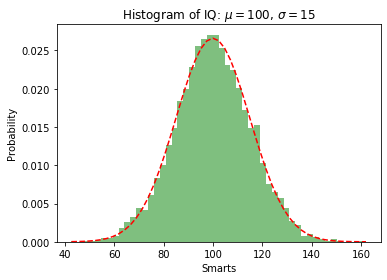

In [3]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
 
# example data
mu = 100 # mean of distribution
sigma = 15 # standard deviation of distribution
x = mu + sigma * np.random.randn(10000)
 
num_bins = 50
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, density=1, facecolor='green', alpha=0.5)
# add a 'best fit' line
y = norm.pdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')
 
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

## Linear Regression

https://dataaspirant.wordpress.com/2014/10/02/linear-regression/

Linear Regression means predicting scores of one variable from the scores of second variable. The variable we are predicting is called the __criterion/depenndent/output variable__ and is referred to as Y. The variable we are basing our predictions is called the __predictor/independent/input variable__ and is referred to as X. 

When there is only one predictor variable, the prediction method is called __simple regression__.

The aim of linear regression is to finding the best-fitting straight line through the points. The best-fitting line is called a __regression line.__

       hθ(x) = θ0 + θ1X
The above equation is __hypothesis equation__

where:

hθ(x) is nothing but the value Y(*which we are going to predicate* )  for particular x ( means Y is a linear function of x)

θ0 is a constant equal to the y intercept of the regression line

θ1 is  the __regression coefficient__ i.e.  the average change in the dependent variable (Y) for a 1-unit change in the independent variable (X). It is the slope of the regression line

X is value of the independent variable

### Properties of the Linear Regression Line
Linear Regression line has the following properties:

1. The line minimizes the sum of squared differences between observed values (the y values) and predicted values (the hθ(x) values computed from the regression equation).
2. The regression line passes through the mean of the X values (x) and through the mean of the Y values ( hθ(x) ).
3. The regression constant (θ0) is equal to the y intercept of the regression line.
4. The regression coefficient (θ1) is the average change in the dependent variable (Y) for a 1-unit change in the independent variable (X). It is the slope of the regression line.

#### The least squares regression line is the only straight line that has all of these properties.


### Goal of  Hypothesis Function
Goal of Hypothesis is to choose θ0 and θ1 , so that hθ(x) is close to Y for our training data,while choosing θ0 and θ1 we have to consider the cost function( J(θ) ) where we are getting low value for cost function( J(θ) ).

The below function is called as cost function, cost function ( J(θ) ) is nothing but just a __Squared error function.__


### Strategy
- Start with some θ0, θ1
- Keepchanging θ0, θ1 to reduce J(θ0,θ1) until we hopefully end up at a minimum

https://dataaspirant.com/linear-regression-implementation-in-python/

In [ ]:
# Function to show the resutls of linear fit model
def show_linear_line(X_parameters,Y_parameters):
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X_parameters, Y_parameters)
    plt.scatter(X_parameters,Y_parameters,color='blue')
    plt.plot(X_parameters,regr.predict(X_parameters),color='red',linewidth=4)
    plt.xticks(())
    plt.yticks(())
    plt.show()   
    

# to call the show linear line function
show_linear_line(X,Y)

# Classification Vs Clustering

https://dataaspirant.com/classification-clustering-alogrithms/

https://sites.google.com/site/dataclusteringalgorithms/home

## Classification Concept
In classification, the idea is to predict the target class by analysis the training dataset. This could be done by finding proper boundaries for each target class. In a general way of saying, Use the training dataset to get better boundary conditions which could be used to determine each target class. Once the boundary conditions determined, the next task is to predict the target class as we have said earlier. The whole process is known as classification.

### Classification Algorithms
- Linear classifiers
    - Logistic regression
    - Naive Bayes classifier
    - Fisher’s linear discriminant
- Support vector machines
    - Least squares support vector machines
- Quadratic classifiers
- Kernel estimation
    - k-nearest neighbor
- Decision trees
    - Random forests
- Neural networks
- Learning vector quantization

### Application of Classification Algorithms
- Email spam classification
- Bank customers loan pay bank willingness prediction.
- Cancer tumour cells identification.
- Sentiment analysis.
- Drugs classification
- Facial key points detection
- Pedestrians detection in an automotive car driving.

## Clustering Concept

In clustering the idea is not to predict the target class as like classification , it’s more ever trying to group the similar kind of things by considering the most satisfied condition __all the items in the same group should be similar and no two different group items should not be similar__.  To group the similar kind of items in clustering, different similarity measures could be used i.e similarity measure is used to cluster.

### Group items Examples:
While grouping similar language type documents (Same language documents are one group.)
While categorising the news articles (Same news category(Sport) articles are one group )


## Clustering Algorithms
Clustering algorithms can be classified into two main categories 
- Linear clustering algorithms and 
- Non-linear clustering algorithms.

### Linear clustering algorithm
- k-means clustering algorithm
- Fuzzy c-means clustering algorithm
- Hierarchical clustering algorithm
- Gaussian(EM) clustering algorithm
- Quality threshold clustering algorithm

### Non-linear clustering algorithm
- MST based clustering algorithm
- kernel k-means clustering algorithm
- Density-based clustering algorithm

### Application of Clustering Algorithms
- Recommender systems
- Anomaly detection
- Human genetic clustering
- Genom Sequence analysis
- Analysis of antimicrobial activity
- Grouping of shopping items
- Search result grouping
- Slippy map optimization
- Crime analysis
- Climatology


Summary:

__Classification__: Predicting target class for test dataset from the trained modeled from the training dataset.

__Clustering__: Using different similarity measure to place the all the similar items in a group.

# Logistic Regression Concept

https://dataaspirant.com/how-logistic-regression-model-works/

“Logistic regression measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities __(likelihood occurrence)__ using a __logistic function__” (Wikipedia)

It uses a black box function to understand the relation between the categorical __dependent variable__ and the __independent variables__. This black box function is popularly known as the __Softmax funciton__.

#### Two functions which determine the logistic regression model. Just for a glance:

- __Softmax__: Used for the multi-classification task.
     - The probabilities sum will be 1
     - Used in the different layers of neural networks.
     - The high value will have the higher probability than other values.
- __Sigmoid__: Used for the binary classification task.
     - The probabilities sum need not be 1.
     - Used as activation function while building neural networks.
     - The high value will have the high probability but not the higher probability.

https://dataaspirant.com/difference-between-softmax-function-and-sigmoid-function/

### Examples of likelihood occurrence of an event
- How likely a customer will buy iPod having iPhone in his/her pocket.
- How likely Argentina team will win when Lionel Andrés Messi in rest.
- What is the probability to get into best university by scoring decent marks in mathematics, physics?
- What is the probability to get a kiss from your girlfriend when you gifted her favorite dress on behalf of your birthday?

If the logistic regression model used for addressing the binary classification kind of problems it’s known as the __binary logistic regression classifier__. Whereas the logistic regression model used for multiclassification kind of problems, it’s called the __multinomial logistic regression classifier__ i.e. using the logistic regression techniques to predict target with __more than 2 target classes__.

The underline technique will be same like the logistic regression for binary classification until calculating the probabilities for each target. Once the probabilities were calculated. We need to transfer them into __one hot encoding__ and uses the cross entropy methods in the training process for calculating the properly optimized weights.

Multinomial logistic regression works well on big data irrespective of different areas. Surprisingly it is also used in human resource development and more in depth details about how the big data is used in human resource development can found in this article.

https://dataaspirant.com/multinomial-logistic-regression-model-works-machine-learning/

In [ ]:
https://dataaspirant.com/implement-logistic-regression-model-python-binary-classification/
    
# About: Implementing Logistic Regression Classifier to predict to whom the voter will vote.
 
# Required Python Packages
import pandas as pd
import numpy as np
import pdb
import plotly.plotly as py
import plotly.graph_objs as go
 
# import plotly.plotly as py
# from plotly.graph_objs import *
py.sign_in('dataaspirant', 'RhJdlA1OsXsTjcRA0Kka')
 
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
 
    
# file 
DATA_SET_PATH = "../Inputs/anes_dataset.csv"
 
 
def dataset_headers(dataset):
        """
    To get the dataset header names
    :param dataset: loaded dataset into pandas DataFrame
    :return: list of header names
    """
    return list(dataset.columns.values)
 
 
def unique_observations(dataset, header, method=1):
    """
    To get unique observations in the loaded pandas DataFrame column
    :param dataset:
    :param header:
    :param method: Method to perform the unique (default method=1 for pandas and method=0 for numpy )
    :return:
    """
    try:
        if method == 0:
            # With Numpy
            observations = np.unique(dataset[[header]])
        elif method == 1:
            # With Pandas
            observations = pd.unique(dataset[header].values.ravel())
        else:
            observations = None
            print "Wrong method type, Use 1 for pandas and 0 for numpy"
    except Exception as e:
        observations = None
        print "Error: {error_msg} /n Please check the inputs once..!".format(error_msg=e.message)
    return observations
 
 
def feature_target_frequency_relation(dataset, f_t_headers):
 
    """
    To get the frequency relation between targets and the unique feature observations
    :param dataset:
    :param f_t_headers: feature and target header
    :return: feature unique observations dictionary of frequency count dictionary
    """
 
    feature_unique_observations = unique_observations(dataset, f_t_headers[0])
    unique_targets = unique_observations(dataset, f_t_headers[1])
 
    frequencies = {}
    for feature in feature_unique_observations:
        frequencies[feature] = {unique_targets[0]: len(
            dataset[(dataset[f_t_headers[0]] == feature) & (dataset[f_t_headers[1]] == unique_targets[0])]),
            unique_targets[1]: len(
                dataset[(dataset[f_t_headers[0]] == feature) & (dataset[f_t_headers[1]] == unique_targets[1])])}
    return frequencies
 
 
def feature_target_histogram(feature_target_frequencies, feature_header):
    """
 
    :param feature_target_frequencies:
    :param feature_header:
    :return:
    """
    keys = feature_target_frequencies.keys()
    y0 = [feature_target_frequencies[key][0] for key in keys]
    y1 = [feature_target_frequencies[key][1] for key in keys]
 
    trace1 = go.Bar(
        x=keys,
        y=y0,
        name='Clinton'
    )
    trace2 = go.Bar(
        x=keys,
        y=y1,
        name='Dole'
    )
    data = [trace1, trace2]
    layout = go.Layout(
        barmode='group',
        title='Feature :: ' + feature_header + ' Clinton Vs Dole votes Frequency',
        xaxis=dict(title="Feature :: " + feature_header + " classes"),
        yaxis=dict(title="Votes Frequency")
    )
    fig = go.Figure(data=data, layout=layout)
    # plot_url = py.plot(fig, filename=feature_header + ' - Target - Histogram')
    py.image.save_as(fig, filename=feature_header + '_Target_Histogram.png')
 
 
def train_logistic_regression(train_x, train_y):
    """
    Training logistic regression model with train dataset features(train_x) and target(train_y)
    :param train_x:
    :param train_y:
    :return:
    """
 
    logistic_regression_model = LogisticRegression()
    logistic_regression_model.fit(train_x, train_y)
    return logistic_regression_model
 
 
def model_accuracy(trained_model, features, targets):
    """
    Get the accuracy score of the model
    :param trained_model:
    :param features:
    :param targets:
    :return:
    """
    accuracy_score = trained_model.score(features, targets)
    return accuracy_score
 
 
def main():
    """
    Logistic Regression classifier main
    :return:
    """
    # Load the data set for training and testing the logistic regression classifier
    dataset = pd.read_csv(DATA_SET_PATH)
    print "Number of Observations :: ", len(dataset)
 
    # Get the first observation
    print dataset.head()
 
    headers = dataset_headers(dataset)
    print "Data set headers :: {headers}".format(headers=headers)
 
    training_features = ['TVnews', 'PID', 'age', 'educ', 'income']
    target = 'vote'
 
    # Train , Test data split
    train_x, test_x, train_y, test_y = train_test_split(dataset[training_features], dataset[target], train_size=0.7)
    print "train_x size :: ", train_x.shape
    print "train_y size :: ", train_y.shape
 
    print "test_x size :: ", test_x.shape
    print "test_y size :: ", test_y.shape
 
    print "edu_target_frequencies :: ", feature_target_frequency_relation(dataset, [training_features[3], target])
 
    for feature in training_features:
        feature_target_frequencies = feature_target_frequency_relation(dataset, [feature, target])
        feature_target_histogram(feature_target_frequencies, feature)
 
    # Training Logistic regression model
    trained_logistic_regression_model = train_logistic_regression(train_x, train_y)
    
    train_accuracy = model_accuracy(trained_logistic_regression_model, train_x, train_y)
 
    # Testing the logistic regression model
    test_accuracy = model_accuracy(trained_logistic_regression_model, test_x, test_y)
 
    print "Train Accuracy :: ", train_accuracy
    print "Test Accuracy :: ", test_accuracy
 
if __name__ == "__main__":
    main()

# Plotting Time

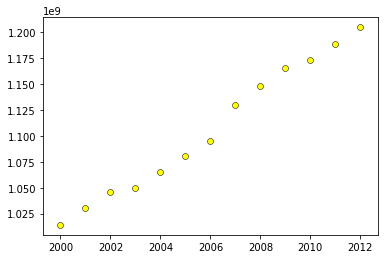

In [4]:
# Required Packages
 
from datetime import datetime
 
x = [ 
datetime(year=2000,month=1,day=1),
datetime(year=2001,month=1,day=1),
datetime(year=2002,month=1,day=1),
datetime(year=2003,month=1,day=1),
datetime(year=2004,month=1,day=1),
datetime(year=2005,month=1,day=1),
datetime(year=2006,month=1,day=1),
datetime(year=2007,month=1,day=1),
datetime(year=2008,month=1,day=1),
datetime(year=2009,month=1,day=1),
datetime(year=2010,month=1,day=1),
datetime(year=2011,month=1,day=1),
datetime(year=2012,month=1,day=1)
]
 
y = [1014004000, 1029991000, 1045845000, 1049700000, 1065071000, 1080264000, 1095352000, 1129866000, 1147996000, 1166079000, 1173108000, 1189173000, 1205074000]

plt.scatter(x, y, c='yellow', linewidths=0.5, edgecolors='black')
 


# Check the target variable for Bias

If the target/dependent variable is __categorical__ i.e not numeric, you need to check that the values for the categorical data is not biased i.e. you don't have one label significantly more in number than the other(s).

Method 1:
    
    print('Total number of labels: {}'.format(df.shape[0]))
    print('Number of male: {}'.format(df[df.columnname == 'male'].shape[0]))
    print('Number of female: {}'.format(df[df[columnname] == 'female'].shape[0]))

where columnname refers to the dependent variable/column name. compare the numbers

Method 2:   

    df['columname'].value_counts().plot.bar()
    

# Normalizing the Features

Standardizing your features is part of EDA. It's used to scale the data between -1 and 1 so once you go through your data and see that some features are say in the thousands while others are in the hundreds or even less than 1, you'll need to normalize/standardize the data after splitting X and y.

First Split X and y

    X = df.drop('target_column', axis=1)
    y = df['target_column']

### label encode target column (y) if it's not numeric 
i.e. to convert it from label to numeric as ML only use numeric

     from sklearn.preprocessing import LabelEncoder 
     label_encoder = LabelEncoder()  # initialize
     y = label_encoder.fit_transform(y)
     # y will become an ndarray
     type(y)
     
### Standardize the features
scale the data to be between -1 and 1

      from sklearn.preprocessing import StandardScaler
      scaler = StandardScaler()
      scaler.fit(X)
      X = scaler.transform(X)
      
Split your data into train and test and carry on with initializing the algorithm, fitting the data (model), make predictions using the test datav(X_test) and then another with the train data (X_train), and comparing accuracy of test (y_test, y_test_pred) and train data (y_train, y_train_pred) to check for overfitting. See example code using Support Vector Machines below:

    from sklearn.svm import SVC
    svc_model = SVC()  # initilize the support vector classifier
    svc_model.fit(X_train, y_train)  # model
    y_pred = svc_model.predict(X_test)  # predict using test data
    
    y_train_pred = svc_model.predict(X_train)  # predict using train data
    
    # check the accuracy
    from sklearn import metrics
    
    print('Testing data accuracy score')
    print(metrics.accuracy_score(y_test, y_pred)
    print('=============================')
    print('Training data accuracy score')
    print(metrics.accuracy_score(y_train, y_train_pred))

# Encoding

Encoding is required because Machine Learning only deals with numbers so categorical data/labels cannot be used in our models without converting it to numbers first.

## One Hot Encoding

One hot encoding is used for encoding features and will create new columns for the classes within the column and assign a 1 for a value under its column and 0 to other columns.

    pd.get_dummies(dataframe['column_name'])
    
To perform one hot encoding, create a list with the list of all the columns to encode and pass it where you have 'column_name' in above formula.

## Label Encoding

Label encoding is used for the target variable because it does not create new additional columns like one-hot-encoding. We cannot have additional columns for our target/dependent variable. The label usually starts from 0.

     from sklearn.preprocessing import LabelEncoder 
     label_encoder = LabelEncoder()  # initialize
     y = label_encoder.fit_transform(dataframe['column_name'])
     

# Decision Tree
#### Numerical features need to be converted into categorical data inorder to use decision tree 

#### Decision Tree Algorithm Advantages and Disadvantages
__Pros:__
- simple to understand, interpret, visualize
- It performed variable screening or feature selection
- It can handle both numerica and categorical data (CART)
- It can handle multi output problems
- requires little effor for data preparation
- nonlinear relationship between parameters do not affect the performance

__Cons:__
- can create over complex trees that do not generalize the data well - overfitting.
- can become unstable because small variations in data can result in a completely different tree being generated. This is called __variance__ and needs to be lowered by methods of __bagging__ and __boosting__.
- greedy algorithms cannot be guaranteed to return the globally optimal decision tree. This can be mitigated by training multiple trees where features and samples are randomly selected with replacement.
- Decision tree learners also create bias trees if some classes dominate it. It is therefore recommended to balance the data set prior to fitting with decision tree.

__What is a greedy algorithm__
As the name suggests, a greedy algorithm always makes the choice that seems to be the best at the moment. This means that it makes a locally-optimal choice in the hope that this choice will lead to a globally-optimal solution.


#### Applications
1. Customer will pay his insurance premium
2. If male/female on the titanic, what are the chances of survival
3. If a person is male/female based on height and wieight
4. Price of a house based on the number of rooms as well as the floor size

Decision tree is drawn like an upside down tree


#### Differences and Similarities between Classification and Regression Trees (CART)

Regression trees are used when the dependent variable is continuous.
Classification trees are used when the dependent variable is categorical.

In the case of regression trees, the value obtained by terminal nodes is the mean or average response of the observation falling in that region thus if an unseen data observation falls in that region will make it's prediction with a mean value.

In the cases of classification trees, the value or class obtained is the mode (occurence) of the observation falling in that region. Therefore prediction is made with the observations that happen most often and not everything as in regression tree.

The splitting continues until a user defined stopping criteria is reached. But the fully grown tree is likely to overfit leading to poor accuracy on unseen data and this brings __PRUNING__

__Pruning__ is one to the techiniques to tackle overfitting. Another way to overcome overfitting in Decision tree is to use the __ENSEMBLE METHOD__
Decision trees are very useful when used with other machine learning algorithms like random forest and boosting.

Growing a tree involves:
1. Features to choose
2. Conditions for splitting
3. Knowing when to stop
4. Pruning

#### Common decision tree algorithm
1. Giri index
2. Chi-square
3. Information gain
4. Reduction in variance

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=4)  # initializing and pruning to avoid overfitting
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
print('Prediction accuracy of test data:', accuracy)

y_pred_train = classifier.predict(X_train)
accuracy_train = accuracy_score(y_pred_train, y_train)
print('Prediction accuracy of train data:', accuracy_train)

# compare both accuracies to determine if there is overfitting, underfitting, or model is appropriate

# Naive Bayes

Works amazingly well in NLP. It predicts the likelihood/probabilty of B given A i.e.

    P(B|A)
    
    # to build a naive bayes model
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()  # initialize
    gnb.fit(X_train, y_train)  # fit/model
    y_gauss_pred = gnb.predict(X_test)  # predict with test data
    y_gauss_train_pred = gnb.predict(X_train)  # predict with train data
    
    # accuracy
    print('Testing data accuracy score')
    print(metrics.accuracy_score(y_test, y_gauss_pred)
    print('=============================')
    print('Training data accuracy score')
    print(metrics.accuracy_score(y_gauss_train, y_gauss_train_pred))

# Support Vector Machines

It's a powerful algorithm suited for extreme cases e.g. trying to identify if a supper fluffy animal at the park is a dog or a cat

It draws a hyperplane at the extreme data points aka Support vectors. SMV is a frontier of which best segregates the two classes(HYPER-PLANE/LINE).

Using the optimal separation/hyper plane is important because unoptimized decision boundary could result in greater miscalculations on new data.

Support Vectors are data points that the margins push against or points that are closes to the opposing class. So the algorithms implies that only support vectors are important whereas other training examples are ignorable.

So we have 
1. D+ which is the shortest distance to the closest positive point, and 
2. D-ve which is the shortest distance to the closest negative point, and
3. Margin of a separator hyper-plane which is 
         Margin = D+ + D-ve

The line or boundary that separates the 2 classes is commonly referred to as a Hyper-plane because SVMs can be used for multiple applications and the data points are referred to as vectors.

Types of SVM
1. Linear Support Vector Machine (LSVM) - the classes are linearly separable
When we have Non-linear SVM i.e. when it's impossible to use a straight line to separate the classes because it will go through data points for both classes, we can use a function to project our data into high dimensional space i.e. 1D to 2D or 2D to 3D and so on.

The only thing with projecting to a higer dimension is that it is computationaly expensive. We can use a __kernel trick__ to reduce the computational cost. A function that takes as its inputs vectors in the original space and returns the dot product of the vectors in the feature space is called a __kernel function__, also referred to as a kernel trick.

Using a kernel function, we can apply the dot product between 2 vectors so that every point is mapped into a high dimentional space via some transformation. i.e. we use it to transform a non linear space into a linear space.

#### Popular Kernel Types
which we can use to transform our data into higher dimensional feature space
- Polynomial kernel
- Radian basis function RBF kernel
- Sigmoid Kernel 
- liner etc.

Deciding on the kernel type  to use a non trivial task because no matter the kernel type you use, you need to __tune the kernel parameters__ to get good performance from a classifier. 

When solving a linear problem, using kernel='linear' when initializing the classifier could improve the accuracy score.

### Popular Parameter Tuning techniques
1. K-fold
2. Cross validation


#### Advantages of SVM
- They are effective in high dimension spaces.
- They are still effective where the number of dimensionns are greater than the number of samples.
- They use a subset of training points in the decision function or support vectors so it's also memory efficient.
- They are versatile so different kernels can be specified for the decision function.
- Common kernels are provided but it's also possible to specify custom kernels.
- We can add kernel functions together to achieve even more complex hyper planes.

#### Disadvantages
- If the number of features is greater than the number of samples, the method is likely to give poor performance.
- SVMs do not directly provide probability estimates. These are calculated using expensive 5 fold cross validation (K-fold cross validation).

#### Applications
It has numerous applications and can be quite popular with neural networks e.g. medical imaging, air quality, image interpolation, time-series predictions, machine fault diagnosis, web page ranking algorithm etc.


When modeling with SVM, the default kernal in sklearn is 'rbf'. You can specify a different kernel when initializing the Support Vector Classifier i.e. svc_model = SVC(kernel = 'newkernerlyouwanttouse')

    from sklearn.svm import SVC
    svc_model = SVC()  # initilize the support vector classifier
    svc_model.fit(X_train, y_train)  # model
    y_pred = svc_model.predict(X_test)  # predict using test data
    
    y_train_pred = svc_model.predict(X_train)  # predict using train data
    
    # check the accuracy
    from sklearn import metrics
    
    print('Testing data accuracy score')
    print(metrics.accuracy_score(y_test, y_pred)
    print('=============================')
    print('Training data accuracy score')
    print(metrics.accuracy_score(y_train, y_train_pred))

In [ ]:
# SVM example
from sklearn.svm import SVC
svc_model = SVC()  # initilize the support vector classifier
svc_model.fit(X_train, y_train)  # model
y_pred = svc_model.predict(X_test)  # predict using test data

y_train_pred = svc_model.predict(X_train)  # predict using train data

# check the accuracy
from sklearn import metrics

print('Testing data accuracy score')
print(metrics.accuracy_score(y_test, y_pred)
print('=============================')
print('Training data accuracy score')
print(metrics.accuracy_score(y_train, y_train_pred))
      
      
# to view the boundary - first create a mesh i.e. the axis tick/grid values
X = X = iris.data[:, :2]    # matplotlib is for 2D maps so you need to specify [:, :2] where :2 will select 'Sepal Length' and 'Sepal width'
y = iris.target
      
import numpy as np
import matplotlib.pyplot as plt
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arrange(x_min, x_max, h), np.arange(y_min, y_max, h))
                     
plt.subplot(1, 1, 1)
Z = svc_iris_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpa=0.8)  # to show the boundary/plane of separation cmap=plt.cm.Paired means to make the data points same color as the plane colors

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title('SVC with linear kernel')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.show()

# Ensemble Learning

- It is a technique used for improving prediction accuracy
- It uses multpl learning lgorithms instead of simgle algorithm

You use multiple homogenous algorithms i.e multiple weak learners are combined to form a strong learner i.e. more generalized rather than overfitted.

2 Commonly used ensemble methods are:
- Bagging/Boostrap aggregating 
- Boosting

Bagging is a machine learning ensemble meta-algorithm designed to improve the stability, reduce variance, and accuracy.

Boosting is a machine learning ensemble meta-algorithm for primarily reducing bias, and also variance in supervised learning. Algorithms that achieve hypothesis boosting simply become known as boosting.


### Bagging
Example of Bagging is __Random Forest Classifier__ (n nnumber of decision trees put together). Random Forest is a bagging technique based on decision tree algorithm. The input data to the algorithm is sub sampled (with __replacement__) and sent to every decision tree initialized earlier at a __random__ fashion.

It grows multiple decision trees (as opposed to a single tree) using algorithms such as:
- information gain
- Gini index approach
- other decision tree algorithms

Each tree gives a classification and we say that the tree votes for that class. The classification with the most votes is chosen. In the case of regression, it takes the average of the outputs by different trees.

__Note that along with the features, the target will also be passed as part of the data for the decision trees__

## Random Forest Classifier
While initializing this algorithm, the number of decision trees has to be specified.

#### Advantages
- Can be used for both classification and regression tasks. 
- Will handle the missing values and maintains accuracy when a large proportion of the data are missing data
- Won't overfit the model 
- Handle large dataset with higher dimensionality

#### Disadvantages
- Good job at classification but not as good for regression problems (as it does not give continuous nature of predictions)
- You have very little control on what the model does. It can seem like a black box to statisticians. You can try different parameters and random seeds.

- Banking - identify Loyal cxs and fraudulent cxs
- Medicine - identiy disease by analyzing the patients medical records
- Identify stock behavior and expected loss/profit by buying a particular stock
- Likelihood of a customer liking the recommened product
- Image classification
- Lip reading and Voice classification

#### Random Forest Pseudocode
1. Assume number of cases in the training set is N. Then, sample of these N cases is taken at random but with replcement.

2. If there are M input variable or features, a number m<M is specified such that at each node, m variables are selected at random our of the M. The best split on these m is used to split the node. The value of m is held constant while we grow the forest.

3. Each tree is grown to the largest ectent possible and __there is no pruning__

4. Predict new data by aggregating the predictions of the n tree trees (i.e. majority votes for classification, average for regression).

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=150, random_state=21)  # initialize
# the random_state above should be removed if you already used seed in your split else you would need to specify it in every algorithm you run
rfc.fit(X_train, y_train)
y_predict = classifier.predict(X_test)
accuracy = accuracy_score(y_predict, y_test)
print(accuracy)


# you will see an increased accuracy compared to decision tree.

## Boosting
Considers homogenous weak learners and learns from them __sequentially__ (each trying to correct its predecessor) unlike bagging where the learning is in parallel. Here the learning is also adaptive--the base model depends on the previous model's output.

#### Advantage
It reduces bias and increases prediction accuracy

### Boosting Algorithms
1. Adaboost classifier i.e Adaptive boost
2. Gradient boost (GBM)
3. __XGBoost__ (Extreme Gradient Boost)

### Adaboost
Step 1:
- Assign equal wieght to each data point
- Apply a decision stump to classify them as +(plus) and -(minus)

__A stump__ is a decision tree with depth = 1 i.e. there is only one level after the root node. The entropy of the stumps are compared and the stump with the lowest gini value will be used as the base learner model. 

Step 2:
- size of incorrectly predicted points is made bigger compared to the rest of the data points
- The second decision stump will try to predict them correctly
The iteration and weighting continues until the class is determined i.e for every misclassified point, the weight is increased to get the point included

### Gradient Boosting
The objective is to reduce the residuals/losses by finding the optimal fit.
It involves three elements:
1. A loss function to be optimized
2. A weak learner to make predictions
3. An additive model to add weak learners to minimize the loss function

GBM minimizes the loss function (MSE) of a model by adding weak learners using a gradient descent procedure.

Steps for GBM
1. Fit a simple regression or classification model
2. Calculate error residuals (actual value - predicted value)
3. Fit a new model on error residuals as target variable with same imput variable
4. Add the predicted residuals to the previous predictions
5. Fit another model on residuals that are remaining and repeat steps 2 and 5 until model lis overfit or the sum of residuals become constant.

### XGBoost

- It is extensively used in ML competitions as it is 10 times faster than other gradient boosting techniques. 
- More powerful than SVM. 
- Used for classification, regression, and ranking. 
- IInterfaces for R and Python and can be executed on  YARN - Yet Another Resource Negotiator - a big data platform
- When training very large models, it can work with clusters of machines
- Has DMatrix structure so the data has to be converted to this data structure before applying XGBoost
- Automatic handling of missing data values
- Supports the parallization of tree construction
- Boost an already fitted model on new data

__XGBoost models__
1. __Gradient Boosting__ - learning rate
2. __Stochastic Gradient Boosting__
3. __Regularized Gradient Boosting__ with both L1(lasso) and L2 regularization

__General Parameters of XGBoost__
1. nthread - number of parallel threads. If no value is entered, the algorithm automatically detects the number of cores and runs on all the cores (i.e. your CPU)
2. __booster__
  - __gbtree__: tree-based model - for classification
  - __gblinear__: linear function - for regression
3. Silent[default=0]
  - if set to 1, no running messages will be printed. Hence, _keep it '0' as the messages might help in understanding the model_.
  
__Booster Parameters__
Booster parametes guide individual booster at each step i.e the tree/linear (gbtree/gblinear)
1. __eta__: is the learning rate i.e step size shrinkage is used in update to prevent overfitting. Range is [0,1] default 0.3 __Note*: Use values 0.1, 0.01, 0.2, 0.02. Never pick learning rate/eta of 1__

2. __gamma__: minimum loss reduction required to make a split
    - Range[0, infinity], default is 0 -- *Use default
3. __max_depth__: maximum depth of a tree i.e levels 
    - Range[1, infinity] default 6  -- even though the range is 1-infinity, __*use 3 to 10 especially if going to a hackerton__
4. __min_child_weight__: minimum sum of instance weight needed in a child
    - Range[0, infinity] default 1 -- Use default value of 1

#### Note: the tree splits from the root node when the entropy INCREASES/information gain REDUCES/loss reduction BEGINS

In [ ]:
# Adaptive boosting -adaboost example
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)


#adaboost
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators = 80)  # the base estimator is a weak learner e.g. decision tree classifier 
ada_model.fit(X_train, y_train)  # you need to pass y data because it's a supervised learning
y_pred= ada_model.predict(X_test)

from sklearn.metrics import accuracy score
print('Accuracy of test data:', accuracy_score(y_test, y_pred))

# You will notice that the accuracy is really high as though it's SVM. 

y_train_pred = ada_model.predict(X_train)
print('Accuracy of train data:', accuracy_score(y_train, y_train_pred))

# There is overfitting but not as bad as decision tree

In [ ]:
# XGBoost 
# Note: needs to be installed if you haven't done so
import xgboost as xgb
from sklearn import datasets

iris = datasets.load_iris()

# assign X and y
X = iris.data
y = iris.target

# split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_size=21)

# building the xgboost model
# for efficient use of the xgboost model, we are going to convert our dataset to the DMatrix format
# DMatrix is the data structure unique for xgboost algorithm

D_train = xgb.DMatrix(X_train, label=y_train)  # the label needs to be used to convert train data to DMatrix
D_test = xgb.DMatrix(X_test) # label is not used to covnert the test data

# initialize a set of parameters using a dictionary because there are many parameters
param = {'eta':0.02, 'max_depth':4, 'objective':'multi:softmax', 'num_class':3 }  # num_class is 3 because we have 3 classes in the iris dataset. Recall that anytime we specify objective as multi:softmax (classes > 2), we also need to specify the num_class

xgb_model = xgb.train(param, D_train, 20)  # 20 is the no of iterations you want it to do before providing a result

# predict
y_xgb_pred = xgb_model.predict(D_test)

# accuracy
from sklearn.metrics import accuracy_score
print('The accuracy of xgb model on iris dataset is')
print(accuracy_score(y_test, y_xgb_pred))

# enhance model
# the accuracy of 91.11% can be improved by adjusting the parmeters and building the model again

param2 = {'eta':0.3, 'max_depth':3, 'objective':'multi:softmax', 'num_class':3 }  # num_class is 3 because we have 3 classes in the iris dataset. Recall that anytime we specify objective as multi:softmax (classes > 2), we also need to specify the num_class
xgb_model2 = xgb.train(param, D_train, 20) 
y_xgb_pred2 = xgb_model2.predict(D_test)
print('The accuracy of xgb model on iris dataset is')
print(accuraccy_score(y_test, y_xgb_pred2))


# you can see that the accuracy increased to 93.33%

# Cross Validation
1. Leave one out cv - very time consumming and not used anymore
2. K-fold cv - There may be an inbalance in selection where data points of same class may be dominant in the test or train data
3. __stratified cross validation__ - ensures that the no of instances of each class for train and test is properly taken to fix the problem experienced with k-fold. Also recall that feature imbalance should be fixed in feature engineering so that is different from what we are talking about here.
4. Time Series cv - for data set with time/time series related dataset. You cannot do a train/test split with time series data (https://www.youtube.com/watch?v=7062skdX05Y)

__CV is an alternative to a train/test split ratio__

In a normal train_test_split, you split the data into percentages. With cross validation all the data is used for train as well as test by splitting the data into a specified number e.g. 4. 3 parts will be used for training and 1 part for testing and in the next iteration, one of the parts used in training will be used for testing and the remaining for training. The iteration will continue untill all of the 4 parts have been used for testing...i.e. k number and the number of iterations is equal.

__k-fold cross validation ------ leave one out for testing__


CV is very helpful when you don't have a huge dataset. e.g. you have 300 observations for 100 possible outcomes which means you have only 3 records for each outcome

In [ ]:
# K fold cross validation with KNN model

from sklearn.model_selection import cross_val_score

# import the model you want to use
from sklearn.neighbors import KNeighborsClassifier

# initialize the model
knn_model = KNeighborsClassifier(n_neighbors=4)

cross_val_score(knn_model, X, y, cv=5, scoring='accuracy').mean()  # pass the model you want to use to train, pass the whole X and y without spliting, cv of 5 means it will split the data into 10 so there will be 10 iterations, the scoring will be required and finally, you specify the mean
# scoring is used for accuracy. You could use rmse when using a the regression model
# you will get an accuracy value from above stop
# you can change the cv values to see if there is an improvement

In [ ]:
# let's demonstrate the cross validation with logistic regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

cross_val_score(logreg, X, y, cv=8, scoring='accuracy').mean()

# You will get a warning that you've exceeded the limit for logistic regression. Recall that it is better for 2 class classification
# You can try using Random Forest and other model types with k-fold cross validation

# Grid Search Cross Validation

- This has nothing to do with splitting the data rather, it's for __best parameter value selection__
- It can be used to tune the hyperparameters of a model
- It loops through predefined hyperparameters and will fit the estimator model on the training data set
- At the end, you can select the best hyperparameter from the predefined list based on the performance
- It's in the model selection package of sklearn

In [ ]:
from sklearn.model_selection import GridSearchCV

# initialize the model object you want to use
knn_gscv = KNeighborsClassifier()

# specify the parameter values to try
params = {'n_neighbors':[4, 5, 6, 10, 15],
         'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
         }

# there are 5*2*4 = 40 values in our params so that's 40 iterations. GridSearch saves us the stress of manually changing a value and reruning the model 40 times

grid_knn = GridSearchCV(estimator=knn_gscv, param_grid=params, cv=5, scoring='accuracy')  # this is like your initialized model

from sklearn.model_selection import train_test_split

# split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# fit the model
grid_knn.fit(X_train, y_train)

print('The best parameter values of KNN model for this dataset are:')
print(grid_knn.best_params_)

# predict
y_pred = grid_knn.predict(X_test)

# accuracy score
accuracy_score(y_test, y_pred)

# another way to check the accuracy score instead of using the accuracy_score and y_pred
# grid_knn.score(X_test, y_test)